In [6]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
# Load data
df = pd.read_csv('../data/raw/IMDB_Dataset.csv')
print(f"✅ Loaded {len(df)} reviews")

[nltk_data] Downloading package punkt to /home/oem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/oem/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /home/oem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/oem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/oem/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


✅ Loaded 50000 reviews


In [9]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def advanced_preprocess(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

sample_text = df['review'].iloc[0]

print("📝 Original Text:")
print(sample_text[:300])

print("\n🧹 Cleaned Text:")
print(clean_text(sample_text)[:300])

print("\n⚡ Advanced Preprocessed Text:")
print(advanced_preprocess(sample_text)[:300])

📝 Original Text:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Tru

🧹 Cleaned Text:
one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a 

⚡ Advanced Preprocessed Text:
one reviewer mentioned watching episode youll hooked right exactly happened methe first thing struck brutality unflinching scene violence set right word trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called nickname given oswald maximum security s


In [14]:
# Apply preprocessing to all reviews
print("🔄 Preprocessing all reviews...")
df['cleaned_review'] = df['review'].apply(clean_text)
df['processed_review'] = df['review'].apply(advanced_preprocess)
# Compare original vs processed lengths
df['original_length'] = df['review'].str.len()
df['processed_length'] = df['processed_review'].str.len()
print("📊 Preprocessing Impact:")
print(f"Average original length: {df['original_length'].mean():.0f}characters")
print(f"Average processed length: {df['processed_length'].mean():.0f}characters")
print(f"Reduction: {((df['original_length'].mean() - df['processed_length'].mean()) / df['original_length'].mean() * 100):.1f}%")
# Show examples
display(df[['review', 'cleaned_review', 'processed_review']].head(3))      

🔄 Preprocessing all reviews...
📊 Preprocessing Impact:
Average original length: 1309characters
Average processed length: 815characters
Reduction: 37.7%


,review,cleaned_review,processed_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,one reviewer mentioned watching episode youll ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...


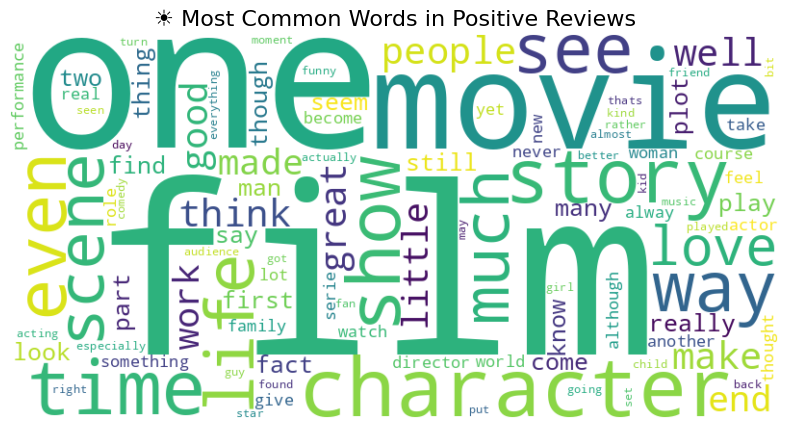

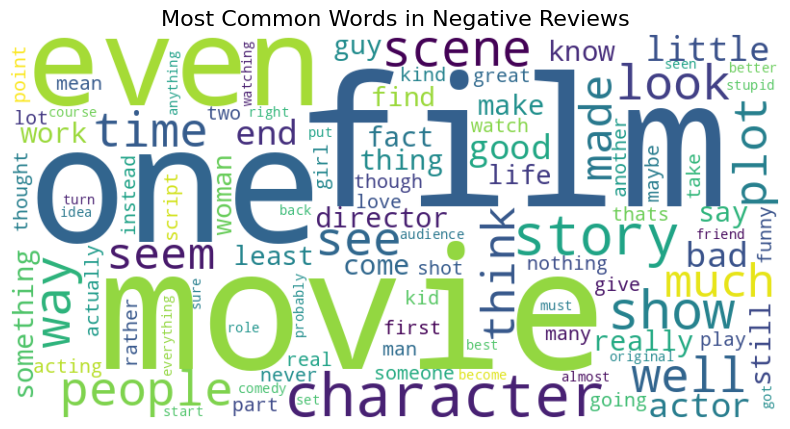

In [19]:
# Create word clouds for positive and negative sentiments
# Create word clouds for positive and negative sentiments
def create_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        max_words=100,
        colormap='viridis'
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()


# Combine all positive reviews
positive_text = ' '.join(df[df['sentiment'] ==
'positive']['processed_review'])
create_wordcloud(positive_text, '☀️ Most Common Words in Positive Reviews')
                 
# Combine all negative reviews
negative_text = ' '.join(df[df['sentiment'] ==
'negative']['processed_review'])
create_wordcloud(negative_text, 'Most Common Words in Negative Reviews')

In [21]:
# Save processed data
df_processed = df[['processed_review', 'sentiment']].copy()
df_processed.to_csv('../data/processed/processed_reviews.csv', index=False)

# Print confirmation
print("💾 Processed data saved to '../data/processed/processed_reviews.csv'")
print(f"✅ Dataset ready for modeling with {len(df_processed)} samples")


💾 Processed data saved to '../data/processed/processed_reviews.csv'
✅ Dataset ready for modeling with 50000 samples
